<h1>Importing All Necessary Modules and Reading Dataset</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

## You can skip the below if you don't have the corresponding method
# from stats.special import expit

<h1>Data Analysis</h1>

Read dataset of diabetes_prediction_dataset.csv

In [2]:
df = pd.read_csv('../data/diabetes_prediction_dataset.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Check shape, dtypes, nan values, number of unique values (with nunique function), and correlations

In [4]:
df.shape

(100000, 9)

In [5]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [6]:
df.isna().sum(0)/df.shape[0]

gender                 0.0
age                    0.0
hypertension           0.0
heart_disease          0.0
smoking_history        0.0
bmi                    0.0
HbA1c_level            0.0
blood_glucose_level    0.0
diabetes               0.0
dtype: float64

In [7]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [8]:
df.corr(numeric_only = True)['diabetes'].sort_values(ascending = False)

diabetes               1.000000
blood_glucose_level    0.419558
HbA1c_level            0.400660
age                    0.258008
bmi                    0.214357
hypertension           0.197823
heart_disease          0.171727
Name: diabetes, dtype: float64

Make a scatter plot with columns of HbA1c_level and diabetes. See patterns

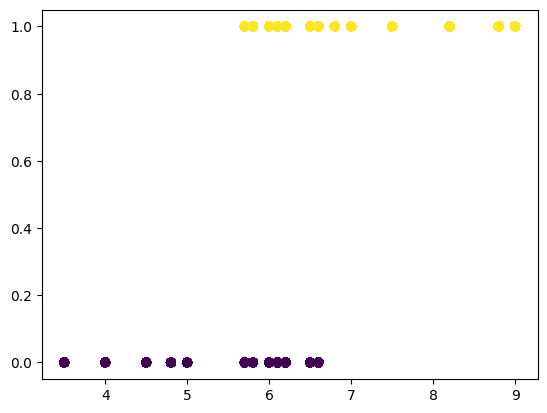

In [9]:
plt.scatter(df['HbA1c_level'], df['diabetes'], c = df['diabetes'])

Plot distribution of diabetes with displot method of seaborn library

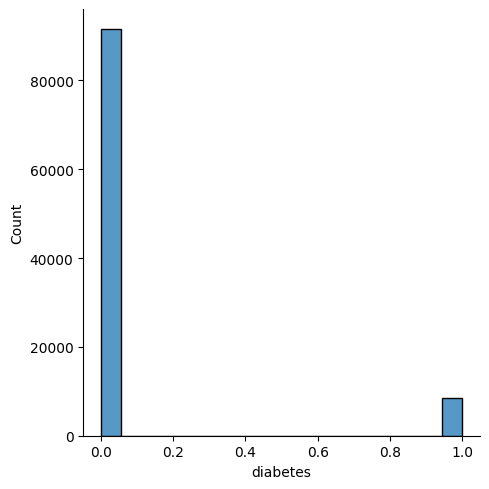

In [10]:
sns.displot(df['diabetes'])

<h1>Data Preparation</h1>

It was already confirmed that one hot encoded version of object columns have no considerable effect on target column. So choose only np.int64 and np.float64 as main features.

In [11]:
numdf = df.select_dtypes([np.float64, np.int64])

Scale continuous columns and split total dataset into train and test parts

In [12]:
X = numdf.drop('diabetes', axis = 1)
y = numdf.diabetes

In [13]:
ss = StandardScaler().fit(X[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])
X[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = ss.transform(X[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

<h1>Modeling</h1>

Train with default parameters and see your results. Use accuracy_score for evaluating the model on only Class - 1. Is the score for class - 1  high enough?

In [15]:
lr = LogisticRegression().fit(X_train, y_train)

In [16]:
lr.score(X_test, y_test)

0.9592

In [17]:
y_pred = lr.predict(X_test)

print('recall for class 1:', accuracy_score(y_test[y_test == 1], y_pred[y_test == 1]))

recall for class 1: 0.6111111111111112


Use class_weight = 'balanced' to fix the imbalancing in dataset and see your results. Is the score for class - 1 high enough?

In [18]:
lr = LogisticRegression(class_weight = 'balanced').fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('recall for class 0:', accuracy_score(y_test[y_test == 0], y_pred[y_test == 0]))
print('recall for class 1:', accuracy_score(y_test[y_test == 1], y_pred[y_test == 1]))

recall for class 0: 0.8878308727177426
recall for class 1: 0.8760683760683761


Fit LogisticRegression again with only HbA1c_level column. Make predictions of both classes and probabilities (with predict_proba) on (the corresponding column of) test dataset.

Predicted probability array contains two probabilities for each row. 0th column indicates Class 0 while the other is for Class 1. 

In [19]:
lr2 = LogisticRegression(class_weight = None).fit(X_train[['HbA1c_level']], y_train)
y_pred2 = lr2.predict(X_test[['HbA1c_level']])
y_proba2 = lr2.predict_proba(X_test[['HbA1c_level']])

In [20]:
y_proba2

array([[9.96729490e-01, 3.27050992e-03],
       [9.94685616e-01, 5.31438448e-03],
       [9.96729490e-01, 3.27050992e-03],
       ...,
       [9.63803104e-01, 3.61968963e-02],
       [9.99533427e-01, 4.66573004e-04],
       [9.09444060e-01, 9.05559400e-02]])

Plot scatter of the feature and prediced classes.

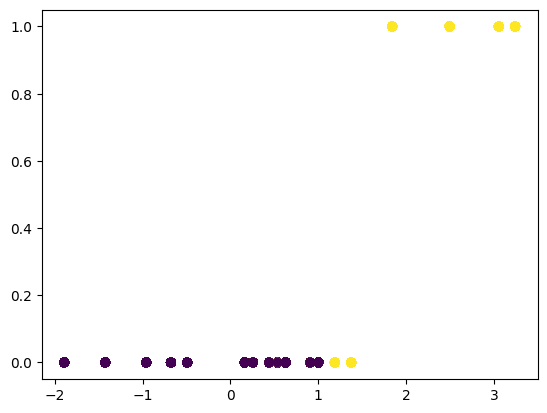

In [21]:
plt.scatter(X_test['HbA1c_level'], y_pred2, c = y_test)

Plot scatter of the feature and predicted probabilities of Class 1. 

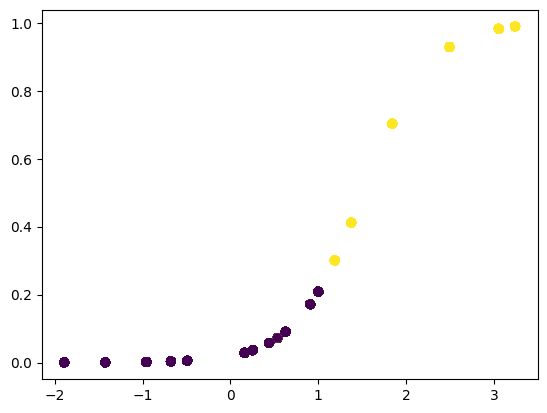

In [22]:
plt.scatter(X_test['HbA1c_level'], y_proba2[:, 1], c = y_test)

There are two attributes that are essential to be used in this notebook - coef_ and intercept_. Your task is to predict with these attributes. Follow the steps shown in the picture originally taken from lecture slides, and use scipy.special.expit method for transforming values into probabilities. If you don't have access to it, create your own expit function by default. 

Ps: expit is sigmoid function

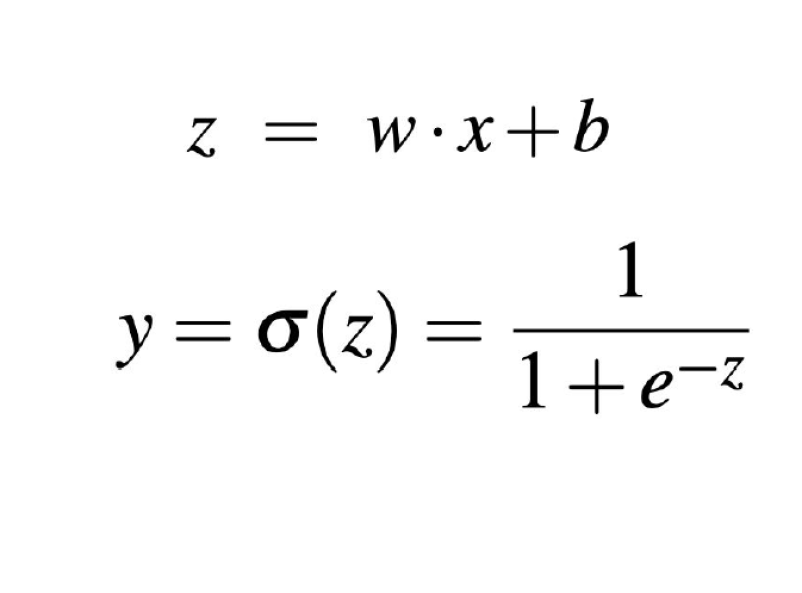

In [23]:
expit = lambda z: 1 / (1 + np.exp(-z))

In [24]:
z = X_test[['HbA1c_level']].values * lr2.coef_ + lr2.intercept_
probas = expit(z)

Once your computation is done, you should have achieved probabilities. In case of probability > 0.5, the datapoint belongs to class 1. Predict classes.

In [25]:
preds = probas.copy()
preds[probas > 0.5] = 1
preds[probas <= 0.5] = 0

Compare your results with LogisticRegression predict method

In [26]:
accuracy_score(y_pred2, preds)

1.0